In [1]:
!pip install opencv-python

In [2]:
import cv2
import numpy as np
from PIL import Image

In [3]:
def show_lst_image(images):
    for i in range(len(images)):
        cv2.imshow('image'+str(i), images[i])
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [35]:
# Read images
img1=Image.open('exp_imgs\\image3.jpeg')
img2=Image.open('exp_imgs\\image4.jpeg')
img1=img1.resize((300,300))
img2=img2.resize((300,300))
img1=np.array(img1)
img2=np.array(img2)
# Convert to grayscale if necessary
if len(img1.shape) == 3:
    img1_np = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
if len(img2.shape) == 3:
    img2_np = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)


In [36]:
sift=cv2.SIFT_create()

In [37]:
kp1, des1 = sift.detectAndCompute(img1_np, None) # kp = key points, des = descriptors
kp2, des2 = sift.detectAndCompute(img2_np, None) # kp = key points, des = descriptors

In [38]:
bf=cv2.BFMatcher() #Use brute force matcher
matches=bf.knnMatch(des1,des2,k=2) #Find the 2 nearest neighbors


In [39]:
good=[]
for m,n in matches:
    if m.distance < 0.80*n.distance:
        good.append([m])

In [40]:
img3 = cv2.drawMatchesKnn(
    img1, kp1, img2, kp2, good, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

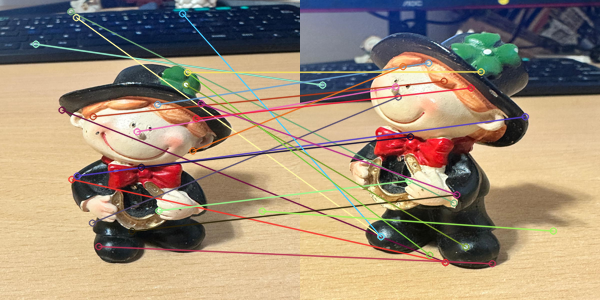

In [41]:
Image.fromarray(img3) #Show the image of the matches


In [42]:
orb = cv2.ORB_create() #Create an ORB object

In [43]:
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

In [44]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True) #Because ORB is a binary descriptor, we find matches using Hamming Distance, which is a measure of the difference between two strings of equal length.

In [45]:
matches = bf.match(des1, des2) #Find the matches

In [46]:
matches = sorted(matches, key=lambda x: x.distance)


In [50]:
img3 = cv2.drawMatches(
    img1,
    kp1,
    img2,
    kp2,
    matches[:],
    None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS,
)

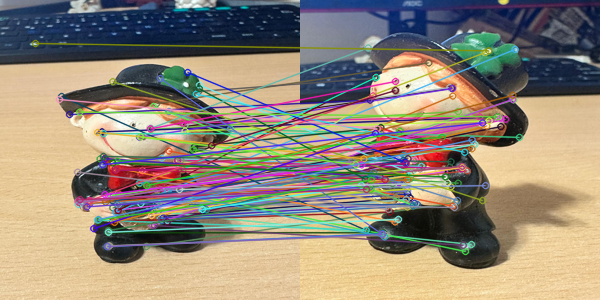

In [51]:
Image.fromarray(img3) #Show the image of the matches

In [52]:
FLANN_INDEX_KDTREE = 1 #First, we create a dictionary to specify the algorithm we will use, for SIFT or SURF it looks like the following.
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5) 
index_params

{'algorithm': 1, 'trees': 5}

In [53]:
FLANN_INDEX_LSH = 6 #For ORB, will use the parameters from the paper.
index_params = dict( 
    algorithm=FLANN_INDEX_LSH, table_number=12, key_size=20, multi_probe_level=2
)

In [54]:
search_params = dict(checks=50) #We also create a dictionary to specify the maximum leafs to visit as follows.

In [55]:
sift = cv2.SIFT_create() # Initialize the SIFT object

In [56]:
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

In [57]:
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(des1, des2, k=2)

In [58]:
matchesMask = [[0, 0] for i in range(len(matches))]

In [59]:
for i, (m, n) in enumerate(matches):
    if m.distance < 0.7 * n.distance:
        matchesMask[i] = [1, 0]

In [60]:
draw_params = dict(
    matchColor=(0, 255, 0),
    singlePointColor=(255, 0, 0),
    matchesMask=matchesMask,
    flags=cv2.DrawMatchesFlags_DEFAULT,
)

img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, matches, None, **draw_params)

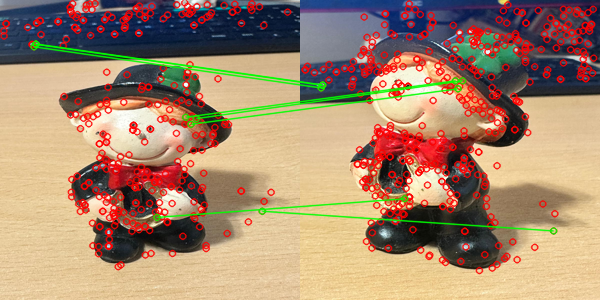

In [61]:
Image.fromarray(img3) #Show the image of the matches

## Local Feature Matching with Transformers (LoFTR)
LoFTR was proposed in LoFTR: Detector-Free Local Feature Matching with Transformers by Sun, et. al. Instead of using feature detectors, LoFTR uses a learning-based approach to feature matching.

Let's keep it simple and use our puzzle example once again. Instead of simply comparing images pixel by pixel, LoFTR looks for specific key points, or features, in each image. It's like identifying the corners and edges of each puzzle piece. And just as someone really good a putting together a puzzle might focus on distinctive marks, LoFTR identifies these unique points in one image. These could be key landmarks or structures that stand out. As we have already learned, it is important that the matching algorithm handles changes in rotation or scale. If a feature is turned or resized, LoFTR would still recognize it. It's like solving puzzles where pieces may be flipped or adjusted. As LoFTR matches features, it assigns a similarity score to indicate how well the features align. Higher scores mean better matches. It's like giving a grade to how well one puzzle piece fits with another. LoFTR is also invariant to certain transformations, meaning it can handle variations in lighting, angle, or perspective. This is crucial when dealing with images that might be photographed under different conditions. LoFTR's ability to robustly match features makes it valuable for tasks like image stitching, where you combine multiple images seamlessly by identifying and connecting common features.

In [1]:
!pip install --upgrade torch kornia numpy pillow

   ---------------------------------------- 0.0/203.1 MB ? eta -:--:--
   ---------------------------------------- 0.5/203.1 MB 8.5 MB/s eta 0:00:24
   ---------------------------------------- 1.3/203.1 MB 4.5 MB/s eta 0:00:46
    --------------------------------------- 2.9/203.1 MB 5.6 MB/s eta 0:00:36
    --------------------------------------- 4.2/203.1 MB 5.9 MB/s eta 0:00:34
   - -------------------------------------- 5.8/203.1 MB 6.2 MB/s eta 0:00:32
   - -------------------------------------- 7.3/203.1 MB 6.3 MB/s eta 0:00:32
   - -------------------------------------- 8.7/203.1 MB 6.3 MB/s eta 0:00:31
   -- ------------------------------------- 10.2/203.1 MB 6.4 MB/s eta 0:00:31
   -- ------------------------------------- 11.8/203.1 MB 6.5 MB/s eta 0:00:30
   -- ------------------------------------- 13.1/203.1 MB 6.5 MB/s eta 0:00:30
   -- ------------------------------------- 14.4/203.1 MB 6.5 MB/s eta 0:00:29
   --- ------------------------------------ 16.0/203.1 MB 6.5 MB/s 

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.4.1+cu121 requires torch==2.4.1+cu121, but you have torch 2.5.0 which is incompatible.
torchvision 0.19.1+cu121 requires torch==2.4.1+cu121, but you have torch 2.5.0 which is incompatible.


In [64]:
import cv2
import kornia as K
import kornia.feature as KF
import matplotlib.pyplot as plt
import numpy as np
import torch
from kornia_moons.viz import draw_LAF_matches

In [65]:
#Load and resize the images.
from kornia.feature import LoFTR

img1 = K.io.load_image("exp_imgs\\image3.jpeg", K.io.ImageLoadType.RGB32)[None, ...]
img2 = K.io.load_image("exp_imgs\\Image4.jpeg", K.io.ImageLoadType.RGB32)[None, ...]

img1 = K.geometry.resize(img1, (512, 512), antialias=True)
img2 = K.geometry.resize(img2, (512, 512), antialias=True)

In [66]:
#Indicate whether the image is an "indoor" or "outdoor" image.
matcher = LoFTR(pretrained="indoor")

In [67]:
#LoFTR only works on grayscale images, so convert to images to grayscale.
input_dict = {
    "image0": K.color.rgb_to_grayscale(img1),
    "image1": K.color.rgb_to_grayscale(img2),
}

In [68]:
with torch.inference_mode():
    correspondences = matcher(input_dict)

In [69]:
mkpts0 = correspondences["keypoints0"].cpu().numpy()
mkpts1 = correspondences["keypoints1"].cpu().numpy()
Fm, inliers = cv2.findFundamentalMat(mkpts0, mkpts1, cv2.USAC_MAGSAC, 0.5, 0.999, 100000)
inliers = inliers > 0

In [72]:
laf0 = KF.laf_from_center_scale_ori(
    torch.from_numpy(mkpts0).view(1, -1, 2),
    torch.ones(mkpts0.shape[0]).view(1, -1, 1, 1),
    torch.ones(mkpts0.shape[0]).view(1, -1, 1),
)
laf1 = KF.laf_from_center_scale_ori(
    torch.from_numpy(mkpts1).view(1, -1, 2),
    torch.ones(mkpts1.shape[0]).view(1, -1, 1, 1),
    torch.ones(mkpts1.shape[0]).view(1, -1, 1),
)

In [74]:
laf1

tensor([[[[ 9.9985e-01,  1.7452e-02,  4.2441e+02],
          [-1.7452e-02,  9.9985e-01,  1.1144e+02]],

         [[ 9.9985e-01,  1.7452e-02,  4.2383e+02],
          [-1.7452e-02,  9.9985e-01,  1.1951e+02]],

         [[ 9.9985e-01,  1.7452e-02,  4.7975e+02],
          [-1.7452e-02,  9.9985e-01,  8.0007e+01]],

         ...,

         [[ 9.9985e-01,  1.7452e-02,  1.4405e+02],
          [-1.7452e-02,  9.9985e-01,  4.7199e+02]],

         [[ 9.9985e-01,  1.7452e-02,  1.5201e+02],
          [-1.7452e-02,  9.9985e-01,  4.7219e+02]],

         [[ 9.9985e-01,  1.7452e-02,  1.6024e+02],
          [-1.7452e-02,  9.9985e-01,  4.8836e+02]]]])

In [9]:
try:
    
    draw_LAF_matches(
        KF.laf_from_center_scale_ori(
            torch.from_numpy(mkpts0).view(1, -1, 2),
            torch.ones(mkpts0.shape[0]).view(1, -1, 1, 1),
            torch.ones(mkpts0.shape[0]).view(1, -1, 1),
        ),
        KF.laf_from_center_scale_ori(
            torch.from_numpy(mkpts1).view(1, -1, 2),
            torch.ones(mkpts1.shape[0]).view(1, -1, 1, 1),
            torch.ones(mkpts1.shape[0]).view(1, -1, 1),
        ),
        torch.arange(mkpts0.shape[0]).view(-1, 1).repeat(1, 2),
        K.tensor_to_image(img1),
        K.tensor_to_image(img2),
        inliers,
        draw_dict={
            "inlier_color": (0.1, 1, 0.1, 0.5),
            "tentative_color": None,
            "feature_color": (0.2, 0.2, 1, 0.5),
            "vertical": False,
        },
    )
    print("Match drawn successfully")
except Exception as e:
    print(f"Error: {e}")

Match drawn successfully


: 

In [75]:
# Convert images to the format expected by K.tensor_to_image
img1_tensor = K.tensor_to_image(img1)
img2_tensor = K.tensor_to_image(img2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0000001].


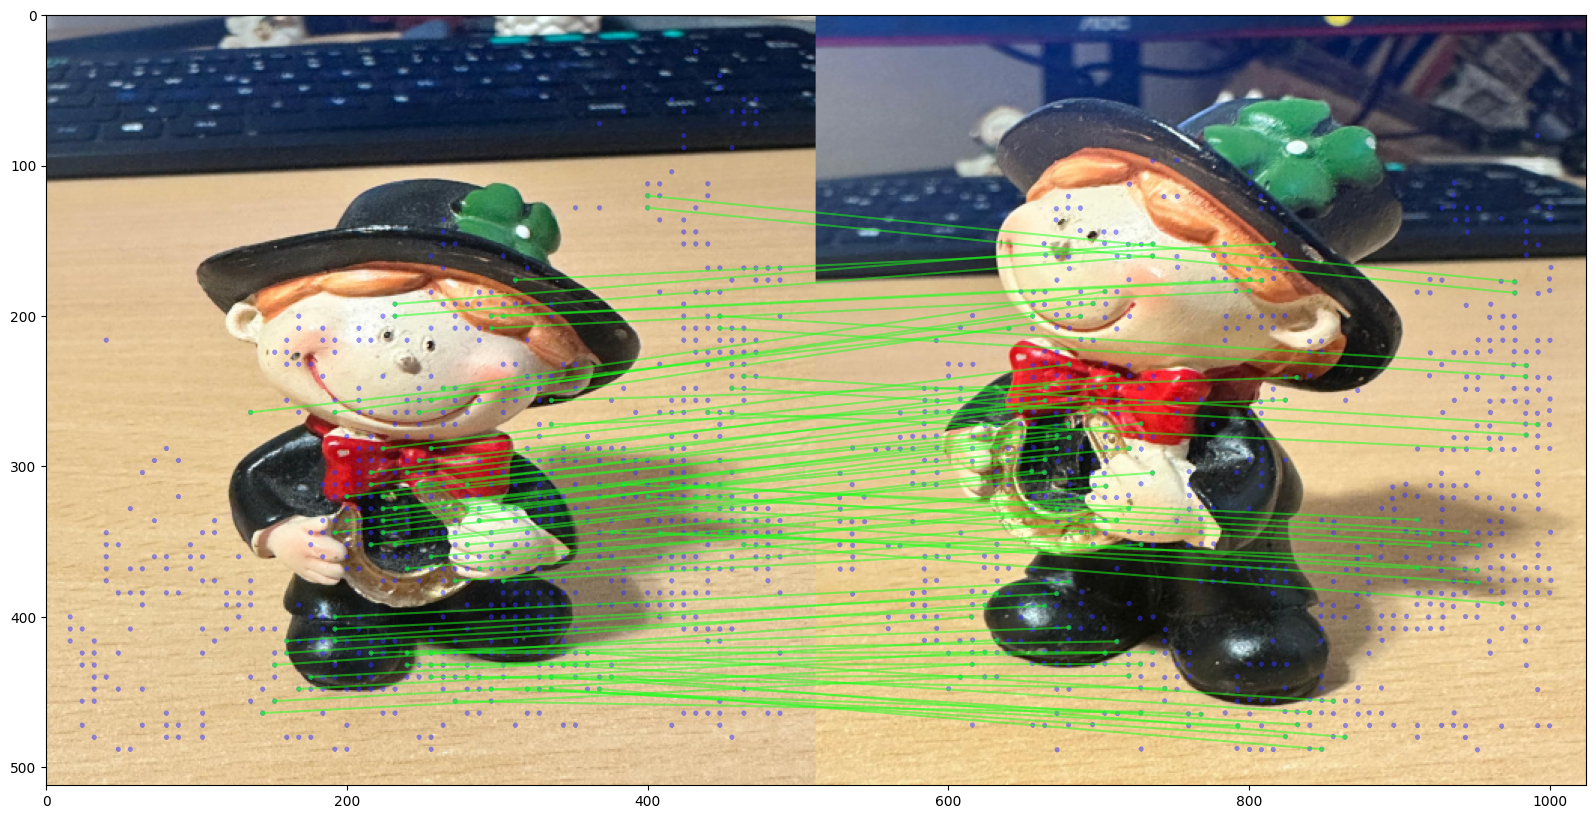

In [76]:
try:
        #Draw matches
    image3=draw_LAF_matches(
        laf0,
        laf1,
        torch.arange(mkpts0.shape[0]).view(-1, 1).repeat(1, 2),
        img1_tensor,
        img2_tensor,
        inliers,
        draw_dict={
            "inlier_color": (0.1, 1, 0.1, 0.5),
            "tentative_color": None,
            "feature_color": (0.2, 0.2, 1, 0.5),
            "vertical": False,
        },
    )
except Exception as e:
    print(f"Error: {e}")